# Reski Saputra

# Task 2

## import library and data

In [1]:
# import library
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_csv('palm_ffb.csv')
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
df.shape

(130, 9)

In [4]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


<AxesSubplot:>

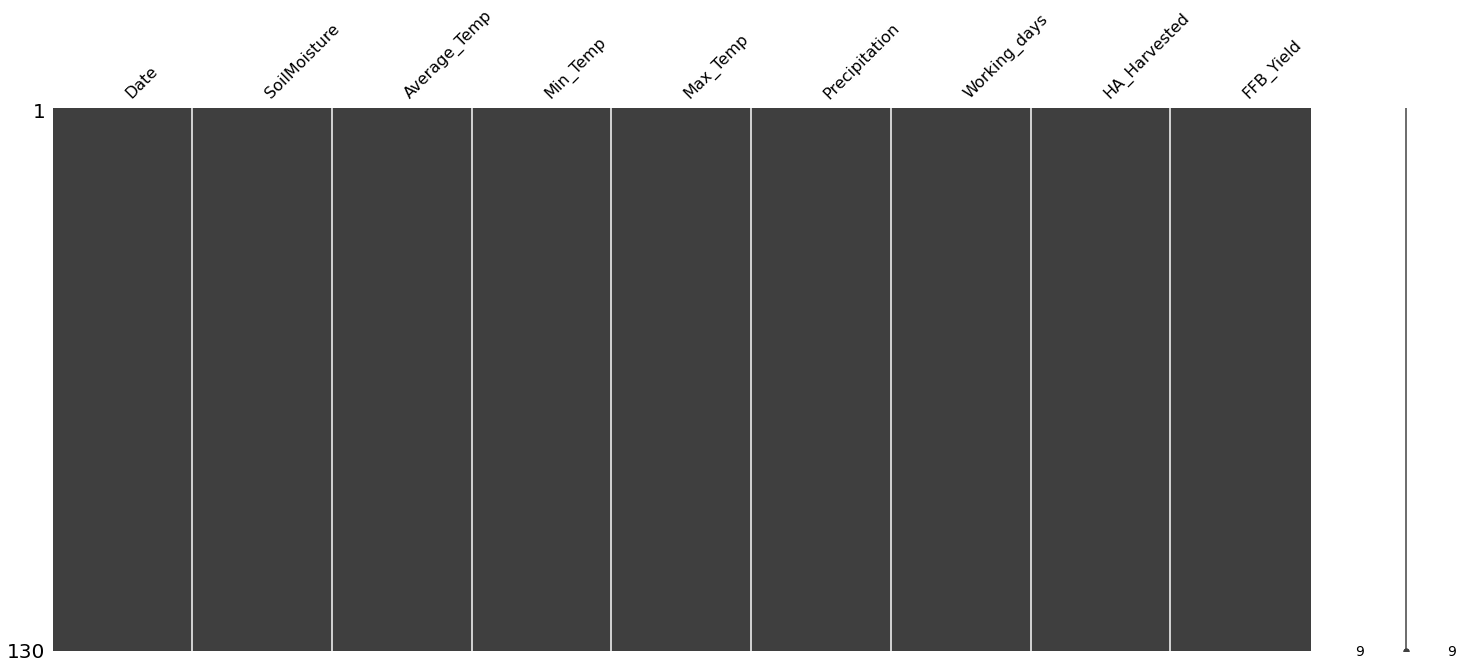

In [5]:
missingno.matrix(df)

### finding
- no missing values

<Figure size 360x216 with 0 Axes>

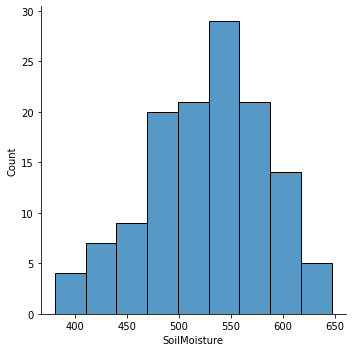

<Figure size 360x216 with 0 Axes>

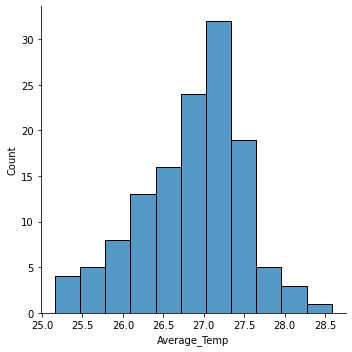

<Figure size 360x216 with 0 Axes>

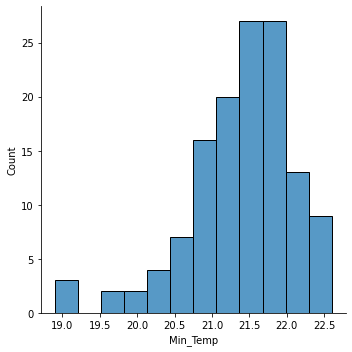

<Figure size 360x216 with 0 Axes>

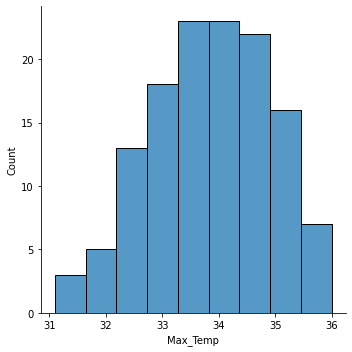

<Figure size 360x216 with 0 Axes>

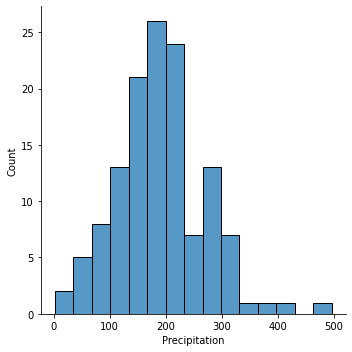

<Figure size 360x216 with 0 Axes>

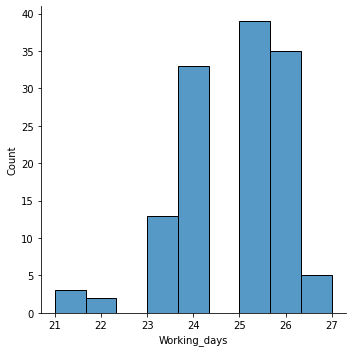

<Figure size 360x216 with 0 Axes>

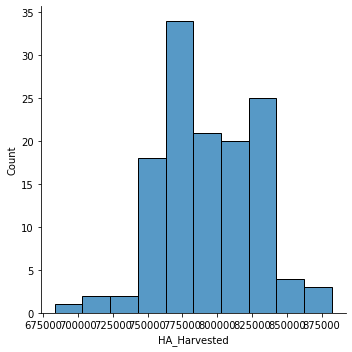

<Figure size 360x216 with 0 Axes>

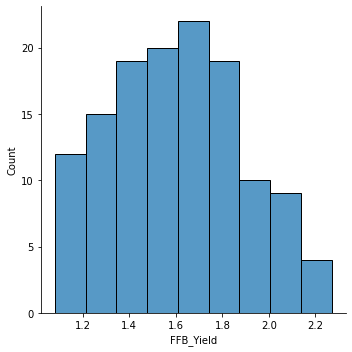

In [6]:
x = ['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested','FFB_Yield']
for i in x :
    plt.figure(figsize=(5,3))
    sns.displot(df[i])
    plt.show()
    

/tmp/ipykernel_18709/2817338545.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew(),axlabel ='Skewness')
/var/home/i/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

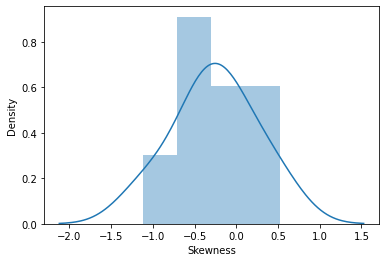

In [7]:
sns.distplot(df.skew(),axlabel ='Skewness')

### finding :
- no issue of variance
- no issue of skewness

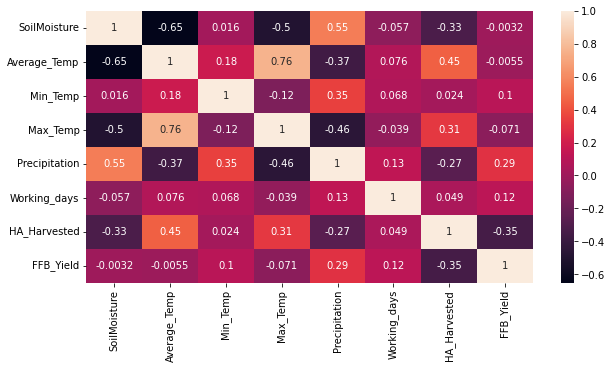

In [8]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### finding
- Precipitation and Working days are positivr corellation to FFB_Yield
- HA_Harvested are negative corelation to FFB_Yield

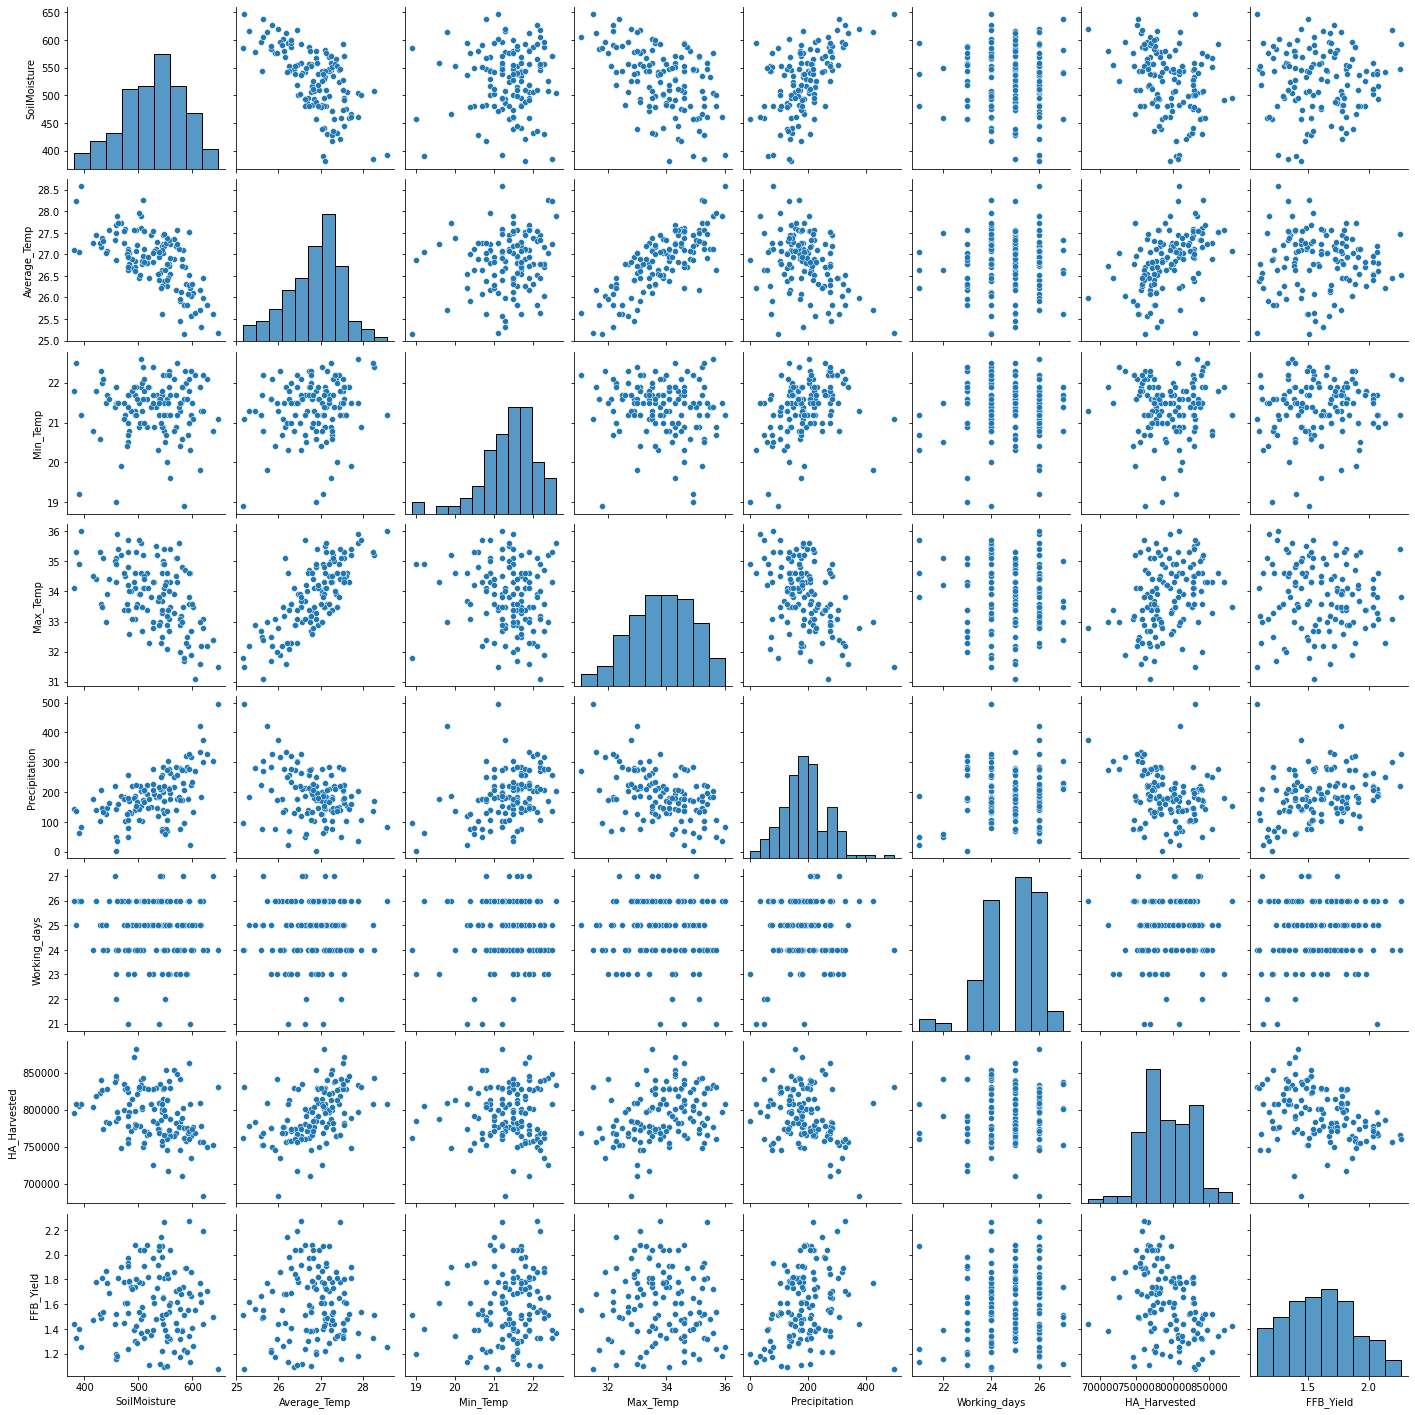

In [9]:
sns.pairplot(df)

## feature selection

In [10]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [11]:
X = df.drop(['FFB_Yield','Date'],axis=1)
y = df['FFB_Yield']
x_category = df[['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested']]

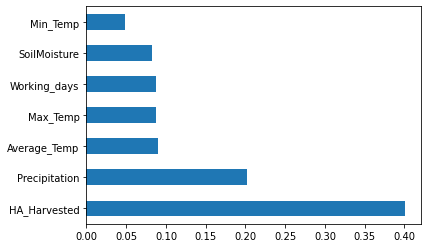

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [12]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(imp)

### finding
- HA_Harvested has the highest importance score.
- Precipitation hsa the second highest importance score.
- Average Temperature has the third highest importance score.

## conclusion
- Conclusions: The most important three variables are HA_Harvested, Precipitation and SoilMoisture. However, SoilMoisture is positively affected by Average_Temp which has shown in correlation analysis. However, the reverse does not make scientific sense. Hence, it would be enough to consider SoilMoisture and drop Average_Temp.